Setup

In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Spreidingsmaten

### Redeneervragen

#### Vraag 1

Bij de test over centrummaten werden volgende resultaten in de frequentietabel genoteerd:

| score | 17  | 18  | 19  | 20  | 21  | 22  | 23  | 24  |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|
| f     | 5   | 6   | 17  | 23  | 32  | 10  | 10  | 7   |

- Zet de frequentietabel om naar de originele gegevens m.b.v. Numpy en een Pandas Series.

In [2]:
# originele data herstellen
data = pd.Series(np.repeat(range(17, 25), [5, 6, 17, 23, 32, 10, 10, 7]))

- Wat is het bereik van deze test?

In [3]:
bereik = data.max() - data.min()
bereik

7

- Wat is de waarde van de interkwartielafstand?

In [4]:
iqr = data.quantile([0.25, 0.75]).diff()
iqr

0.25     NaN
0.75    1.75
dtype: float64

- Wat betekent deze interkwartielafstand?

In [17]:
# als je de 25% laagste waarden en de 25% hoogste waarden weg laat, dan is het bereik gelijk aan 1,75

- Teken een boxplot

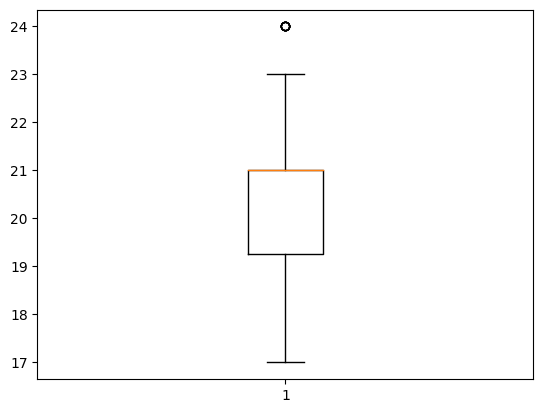

In [5]:
# boxplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.boxplot(data)

- Wat is er speciaal aan deze boxplot?  Hoe komt dit?

In [6]:
# Speciaal: we zien dat de Mediaan en Q3 samenvallen, dus we zien geen middenstreep
# we zien dat de whiskers 17 en 23 zijn i.p.v. 16,625 en 23,625 omdat de whisker de waarneming is die respectievelijk groter en kleiner is dan deze grenswaarden

data.quantile(0.75)
data.median()


21.0

21.0

- Wat is de standaardafwijking (4 beduidende cijfers, gebruik de `signif` functie uit `hulpfuncties.py`)?

In [7]:
from hulpfuncties import *

signif(data.std(), 4)

1.714

#### Vraag 2

Uit een studenten enquete halen we:

|'vrije tijdsbesteding' |Gamen|Jeugdbeweging|Internet, Sociale Media|Film en TV series|Muziek|Sport|Lezen|Andere|Dansen|
|------|---|---|---|---|---|---|---|---|---|
|frequentie                                |25    |7            |5                       |7               |10     |23|1|5|1


|'belangrijkheid om informaticus te worden' |extreem|zeer groot|groot|matig|
|------|---|---|---|---|
|frequentie  |17|  25|44 |11   |

Op welke meetschaal zijn de deze gegevens gemeten?

In [21]:
# nominaal
# ordinaal

Zet deze gegevens eerst om naar twee Pandas Categoricals. Hou rekening met de meetschaal.

In [9]:
data = np.repeat(
    ['Gamen', 'Jeugdbeweging', 'Internet/Social Media', 'Film en TV-series', 'Muziek', 'Sport', 'Lezen', 'Andere',
     'Dansen'],
    [25, 7, 5, 5, 10, 23, 1, 5, 1])

vrije_tijd = pd.Categorical(data, categories=['Gamen', 'Jeugdbeweging', 'Internet/Social Media', 'Film en TV-series',
                                              'Muziek', 'Sport', 'Lezen', 'Andere', 'Dansen'])

data = np.repeat(
    ['extreem', 'zeer groot', 'groot', 'matig'],
    [17, 25, 44, 11])

informaticus = pd.Categorical(data, categories=['matig', 'groot', 'zeer groot', 'extreem'], ordered=True)

Welke van de volgende waarden kun je berekenen (leg uit) voor de variabele 'vrije tijdsbesteding' en voor de variabele 'belangrijkheid om informaticus te worden' wat is hun waarde?

- Gemiddelde
- Standaardafwijking
- Mediaan
- Interkwantielafstand
- Bereik
- Modus

In [14]:
# hier komt jouw oplossing
# - Gemiddelde: NEE
# - Standaardafwijking: NEE
# - Mediaan:
#       vrije_tijd: NEE
#       informaticus: JA

median(informaticus)

# - Interkwantielafstand:
#       vrije_tijd: NEE
#       informaticus: JA, maar eigenlijk is dit niet echt correct, want de categorieën gelijkstellen aan getallen is fout.
#                     De IQR moeten in dat geval ook anders bekijken dan voor intervalvariabelen waarvoor Q3-Q1=1, want het
#                     heeft hier geen echte betekenis. Eerder kunnen we zeggen IQR=['groot','zeer groot'] (van 'groot' tot 'zeer groot')

# Ter illustratie hoe het toch zou kunnen in Python.
Q = pd.Series(informaticus.codes).quantile([0.25, 0.75]).astype(int)
informaticus.categories[Q[0.25]]
informaticus.categories[Q[0.75]]

# - Bereik:
# - Modus: JA
vrije_tijd.value_counts().mode()
informaticus.value_counts().mode()

'groot'

'groot'

'zeer groot'

0    5
dtype: int64

0    11
1    17
2    25
3    44
dtype: int64

In [ ]:
# gemiddelde 7 en standaardafwijking 2,3 als een 6 een 5 moet worden dan zal het gemiddelde dalen, dit heeft dan een impact op alle waarden
# men kan via lange analyse aantonen dat nieuwe standaardafwijking groter zal zijn
# HINT vervang de laatste waarde x_n=6 door 5. Toon aan dat nieuwe gemiddelde gelijk is aan 7n-1/n, 
# want som van alle waarnemingen is n7 en we hebben van 1 waarneming een waarde die 1 kleiner is dus is nu de som van alle waarnemingen 7n-1
# gemiddelde is dus (7n-1)/n
# HINT gebruik var(x)= 1/n𝞢x_i^2 - gemiddelde^2 hieruit kan men afleiden dat 
# var_nieuw-var_oud=(3n-1)/n^2 dit is steeds positief voor n>1 dus is standaardafwijking ook groter dan 2.3
# OPMERKING het gegeven std=2.3 heeft men eigenlijk niet nodig!

#### Vraag 3

Van een variabele (X) is het gemiddelde 20, de mediaan 18, de variantie 6 en de interkwartielafstand 4. Bij alle scores wordt 10 opgeteld.

Wat is het nieuwe gemiddelde?
Wat is de nieuwe mediaan?
Wat is de nieuwe variantie?
Wat is de nieuwe interkwartielafstand?

$M_1 = \frac{1}{n}\sum{x_i}$

$M_2 = \frac{1}{n}\sum{x_i + 10} = \frac{1}{n} (10 \cdot n + \sum {x_i}) = 10 + \frac{1}{n}\sum{x_i} = 10 + M_1$

De mediaan sorteert al getallen van klein naar groot en neemt dan de middelste waarde. Wanneer al deze waarden verhoogd worden met 10 zal ook de mediaan verhoogd worden met 10: $Me_2 = 10 + Me_1$. Idem voor de modus: $Mo_2 = 10 + Mo_1$

De variantie verandert niet, want het verschil tussen elke nieuwe $x_i$ en het nieuwe gemiddelde $M_2$ is niet veranderd. Beide zijn verhoogd met 10, maar het verschil ertussen dus niet, en ook het kwadraat daarvan niet.

De IQR verandert niet, want de kwartielen zijn beide verhoogd met 10 maar het **verschil** ertussen blijft hetzelfde.

#### Vraag 4

Van een frequentieverdeling worden alle scores door 4 gedeeld. Wat weten we van de standaardafwijking van deze nieuwe scores?

- gelijk aan die van de oorspronkelijke score
- 2x zo klein als die van de oorspronkelijke score
- 4x zo klein als die van de oorspronkelijke score
- 16x zo klein als die van de oorspronkelijke score


4x zo klein als die van de oorspronkelijke score, want

$M_2 = \frac{1}{n}\sum{\frac{x_i}{4}} = \frac{1}{4} \cdot \frac{1}{n}\sum{x_i} = \frac{1}{4} \cdot M_1$

$var_1 = \frac{1}{n}\sum{(x_i - M_1)^2}$ en

$var_2 = \frac{1}{n}\sum{(\frac{x_i}{4} - \frac{M_1}{4})^2} = \frac{1}{n}\sum{\frac{1}{16}(x_1 - M_1)^2} = \frac{1}{16} \cdot var_1$

$std_2 = \sqrt{\frac{1}{16} \cdot var_1} = \frac{1}{4} \cdot std_1$

#### Vraag 5

De gemiddelde leeftijd van deze klas is 20 met een standaardafwijking van 2. Binnen 20 jaar is er een reunie.  Iedereen leeft nog en is aanwezig.
Hoe groot is het gemiddelde en de standaardafwijking over 20 jaar?

* 40 en 2 jaar
* 40 en 4 jaar
* 40 en 1 jaar
* niet te bepalen, er zijn te weinig gegevens

In [25]:
# 40 en 2 jaar, want het gemiddelde is + 20 gedaan, maar de onderlinge afstanden tussen de leeftijden is niet veranderd.

#### Vraag 6

De verdeling van scores heeft een gemiddelde van 8 met een standaarddeviatie van 2. We willen de scores zodanig transformeren dat het gemiddelde gelijk wordt aan 10 en de standaarddeviatie gelijk aan 4. Wat moeten we dan met alle scores doen?

* met 2 vermenigvuldigen
* met 2 vermeerderen
* met 2 vermenigvuldigen en dan met 2 vermeerderen
* met 2 vermeerderen en dan 2 vermenigvuldigen
* met 2 vermenigvuldigen en dan met 6 verminderen


In [26]:
# met 2 vermenigvuldigen en dan met 6 verminderen,
# want x2 doen heeft impact op:
# standaardafwijking: std2 = 2 x std1 = 4
# gemiddelde: Me2' = 2 x Me = 16
# MAAR gemiddelde moet 10 zijn en geen 16 dus alle getallen nog verminderen met 6 heeft alleen impact op:
# gemiddelde: Me2 = Me2' - 6 = 10


#### Vraag 7 (*) (wiskundig)

*Deze oefening is wat moeilijker en ze kan eventueel overgeslagen worden, maar je kan natuurlijk wel altijd eens proberen.*

Van een frequentieverdeling (populatie) is het gemiddelde $M$ gelijk aan 7 en de standaardafwijking gelijk aan 2.3.

Er blijkt echter een invoerfout bij de scores gemaakt te zijn: één score van 6 had een 5 moeten zijn. Na herstel
berekenen we opnieuw.

- Hoe groot is dan het nieuwe gemiddelde?
- Stel een formule op in functie van n, het aantal waarnemingen om het verschil (nieuwe variantie -  oude variantie ) te berekenen.

HINT:  $var(X)=\frac{1}{n}\sum\limits_{i=1}^n x_i^2 - M^2$

- Wat weten we van de standaardafwijking?
  * kleiner dan 2.3
  * gelijk aan 2.3
  * groter dan 2.3
  * dit kunnen we niet weten

Stel $X_1$ is de reeks getallen met de 6 erin en $X_2$ diezelfde getallen met de 6 vervangen door een 5.

Voor de correctie door gevoerd wordt, is het gemiddelde $M_1 = \frac{1}{n}\sum\limits_{i=1}^{n}x_i = 7$.

We weten echter dat één van deze $x_i$ een 6 is en dit een 5 had moeten zijn. We schrijven $M_1$ daarom als volgt:

$M_1 = \frac{1}{n} (6 + \sum\limits_{i=1}^{n-1}x_i) = 7$.

Hieruit kunnen we de term $\sum\limits_{i=1}^{n-1}x_i$ halen als volgt:

$\frac{1}{n} (6 + \sum\limits_{i=1}^{n-1}x_i) = 7 \Leftrightarrow 6 + \sum\limits_{i=1}^{n-1}x_i = 7 \cdot n$\
$\phantom{\frac{1}{n} (6 + \sum\limits_{i=1}^{n-1}x_i) = 7}\Leftrightarrow \sum\limits_{i=1}^{n-1}x_i = 7 \cdot n - 6$

Het gemiddelde $M_2$ is gelijk aan (6 vervangen door 5):

$M_2 = \frac{1}{n} (5 + \sum\limits_{i=1}^{n-1}x_i) = \frac{1}{n} (5 + 7 \cdot n - 6) $

$\phantom{M_2 = \frac{1}{n} (5 + \sum\limits_{i=1}^{n-1}x_i)} = \frac{1}{n} (7 \cdot n - 1) $\
$\phantom{M_2 = \frac{1}{n} (5 + \sum\limits_{i=1}^{n-1}x_i)} = 7 - \frac{1}{n} $\
$\phantom{M_2 = \frac{1}{n} (5 + \sum\limits_{i=1}^{n-1}x_i)} = M_1 - \frac{1}{n} $\
We maken nu het verschil tussen de varianties:

$var(X_2) - var(X_1) = \frac{1}{n}\sum\limits_{i=1}^n x_i^2 - M_2^2 - (\frac{1}{n}\sum\limits_{i=1}^n x_i^2 - M_1^2)$

$\phantom{var(X_2) - var(X_1)} = \frac{1}{n}(5^2 + \sum\limits_{i=1}^{n-1} x_i^2) - (M_1 - \frac{1}{n})^2 - \frac{1}{n}(6^2 + \sum\limits_{i=1}^{n-1} x_i^2) + M_1^2 $\
$\phantom{var(X_2) - var(X_1)} = \frac{25}{n} - (M_1 - \frac{1}{n})^2 - \frac{36}{n} + M_1^2$\
$\phantom{var(X_2) - var(X_1)} = \frac{25}{n} - M_1^2 - \frac{1}{n^2} + \frac{2}{n} \cdot M_1 - \frac{36}{n} + M_1^2$\
$\phantom{var(X_2) - var(X_1)} = \frac{25}{n} - \frac{36}{n} - \frac{1}{n^2} + \frac{2}{n} \cdot 7 $\
$\phantom{var(X_2) - var(X_1)} = \frac{3}{n} - \frac{1}{n^2} = \frac{3 \cdot n - 1}{n^2}$\
Voor alle $n > 1$ is deze breuk positief, en is dus de variantie van $X2$ groter dan die van $X1$ en dus is standaardafwijking ook groter dan 2.3


#### Vraag 8

Laad het bestand “UofS_access_log” in terug in (zie oefeningen over frequenties).  

In [ ]:
import pandas as pd

web = pd.read_csv('../datasets/UofS_access_log', header=None, sep=" ", on_bad_lines='skip', encoding='latin')
timestamp = pd.Series(pd.to_datetime(web[[3, 4]].apply(''.join, axis=1), format='[%d/%b/%Y:%H:%M:%S%z]'),
                      name='timestamp')
web = web.drop(columns=[1, 2, 3, 4])
web.columns = ['domain', 'request', 'response_code', 'response_length']
web['timestamp'] = timestamp
del timestamp
web.response_length = pd.to_numeric(web.response_length, errors='coerce')

web.head()
web.info()

a. Maak een histogram van het aantal bytes die er verstuurd zijn, met een klassebreedte van 1000 bytes.  Wat zie je?  Hoe komt dit?

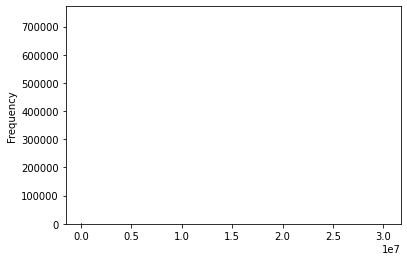

In [43]:
# eerst bins aanmaken
import numpy as np

grenzen = np.arange(start=web.response_length.min(), stop=web.response_length.max(), step=1000, dtype=int)
# plot proberen te maken
_ = web.response_length.plot.hist(bins=grenzen)
# Niet erg informatief.
# Klassenbreedte is te klein --> niets te zien.

b. Maak een nieuw histogram met alle berichten tot 13000 bytes lang (zelfde klassebreedte).  Zorg dat de linkergrens altijd tot het interval behoort.

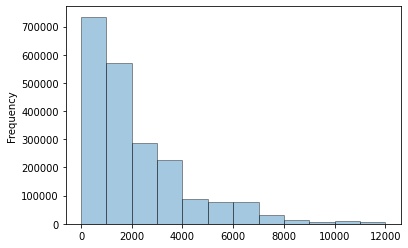

In [42]:
web_small = web[web.response_length <= 13000]
grenzen = np.arange(start=web_small.response_length.min(), stop=web_small.response_length.max(), step=1000, dtype=int)
_ = web_small.response_length.plot.hist(bins=grenzen, edgecolor='black', alpha=0.4)

c. Wat is de modus hiervan?

In [32]:
klassen = pd.cut(web_small.response_length, bins=grenzen)
klassen.mode()

0    (1000, 2000]
Name: response_length, dtype: category
Categories (12, interval[int64]): [(0, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] ... (8000, 9000] < (9000, 10000] < (10000, 11000] < (11000, 12000]]

d. Wat is het gemiddeld aantal verstuurde bytes (4 beduidende cijfers)?

In [33]:
web.response_length.mean()
web_small.response_length.mean()

5479.282453046476

2165.6212659749626

e. Wat is de standaardafwijking van het aantal verstuurde bytes?  (4 beduidende cijfers)  Wat wil dit zeggen?

In [34]:
web_small.response_length.std()
# dit is een maat voor de spreiding rond het gemiddelde

2226.7778468222086

f. Wat zijn de kwartielen van het aantal verstuurde bytes?

In [35]:
web_small.quantile([0, 0.25, 0.5, 0.75, 1])

,response_code,response_length
0.00,200.0,0.0
0.25,200.0,388.0
0.50,200.0,1630.0
0.75,200.0,3272.0
1.00,500.0,12997.0


g. Wat is de betekenis van het derde kwartiel?

In [36]:
# 75% van de requests heeft een kleiner aantal verstuurde bytes

h. Wat is de interkwartielafstand van het aantal verstuurde bytes?  Wat betekent dit?

In [37]:
iqr = web_small.response_length.quantile([0.25, 0.75]).diff()
iqr

0.25       NaN
0.75    2884.0
Name: response_length, dtype: float64

i. Maak een boxplot van het aantal verstuurde bytes.  Hoe interpreteer je deze grafiek?

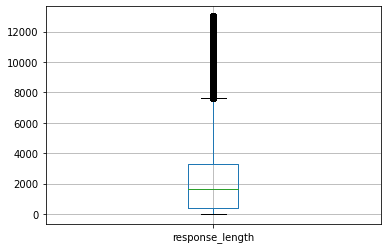

In [38]:
_ = web_small.boxplot('response_length')
# er zijn heel veel outliers

j. Hoeveel uitschieters zijn er?  Wat is het minimum van deze uitschieters?

In [39]:
# het zoeken van uitschieters is een veel voorkomende activiteit
# vandaar dat hiervoor een aparte functie is gemaakt in een apart bestand
# zodanig dat we dit voor eender project kunnen hergebruiken

#deze import verondersteld dat het bestand uitschieters.py een functie 'outliers' definieert
from hulpfuncties import *

web_small.response_length[uitschieters(web_small.response_length)]

14          9651.0
70          9651.0
78          9651.0
156         9651.0
167         9651.0
            ...   
2408439    11337.0
2408448     9225.0
2408484    11337.0
2408489    10753.0
2408501    11337.0
Name: response_length, Length: 71079, dtype: float64

k. Verwijder de uitschieters en maak terug een boxplot (er ontstaan hier weer outliers, maar zoek een optie bij boxplot om deze niet te tekenen)

In [40]:
web_small_no_outliers = web_small[~uitschieters(web_small.response_length)]

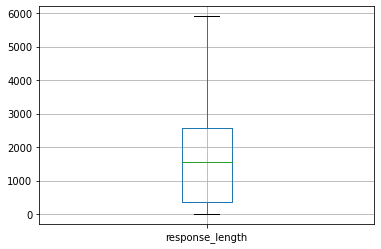

In [41]:
_ = web_small_no_outliers.boxplot('response_length', showfliers=False)